In [116]:
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris=load_iris()
scaler=MinMaxScaler()

In [117]:
df=pd.DataFrame(iris.data)

In [118]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [120]:
df=df.drop(['sepal_length','sepal_width'],axis='columns')

In [121]:
#scaler.fit(df[['sepal_length']])

In [122]:
#df.sepal_length=scaler.transform(df[['sepal_length']])

In [123]:
#qscaler.fit(df[['sepal_width']])

In [124]:
#df.sepal_width=scaler.transform(df[['sepal_width']])

In [125]:
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


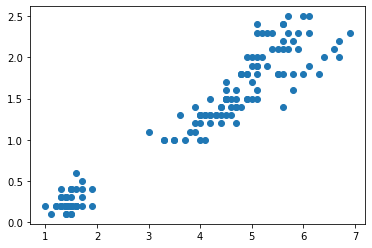

In [126]:
plt.scatter(df.petal_length,df.petal_width)

In [149]:
km=KMeans(n_clusters=3)

In [163]:
y_predicted=km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [164]:
df['clusters']=y_predicted

In [165]:
df.head()

,petal_length,petal_width,clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [166]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
km.cluster_centers_

array([[1.46200000e+00, 2.46000000e-01, 2.22044605e-16],
       [5.26986301e+00, 1.85342466e+00, 1.64383562e+00],
       [3.92222222e+00, 1.19629630e+00, 5.92592593e-01]])

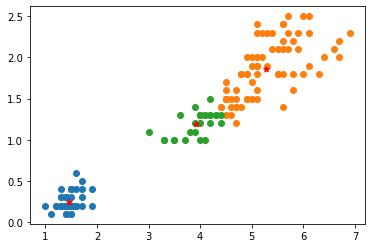

In [167]:
plt.scatter(df1.petal_length,df1.petal_width)
plt.scatter(df2.petal_length,df2.petal_width)
plt.scatter(df3.petal_length,df3.petal_width)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*')

In [168]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

C:\Users\Rushabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [169]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.040239971910458,
 9.215301022648848,
 7.794967602830605,
 6.576538396386222]

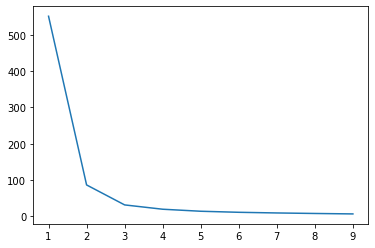

In [170]:
plt.plot(k_rng,sse)

In [171]:
df

,petal_length,petal_width,clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1
